### NOTEBOOK CONTENTS

- code to calculate of how much of the domain is $\Omega_A$ undersaturated

- would it be worth it to see how much is undersaturated, not including river areas (it won't matter too much...)?

#### Production of .nc documentation is found in: carbon_dev/PI_CARBON_PAPER/location_important_extracted_calculated_quantities.txt



In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import pickle

import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




In [4]:
mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')



(40, 898, 398)
222394.0735048354
222394.0735048354


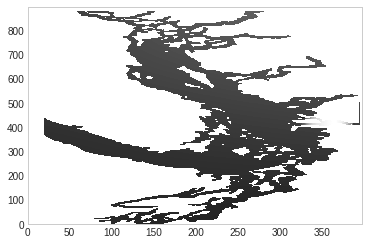

In [5]:
#print(mmask)

#print(mmask['e2t'])
#print(mmask['e3t_0'])

#dom_size = np.zeros(40,898,398)

csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))

print(np.shape(csize))

print(csize[0,250,250])
plt.pcolormesh(csize[0,:,:])

print(mmask['e2t'][0,250,250]*mmask['e1t'][0,250,250]*mmask['e3t_0'][0,0,250,250])

In [7]:



# #make a new large nc for PI4
# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# BR_oma_summer = np.zeros([365,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%30 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI5_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_summer[i,:,:,:] = t_Oma
    
# ncname = '../pkls/PI5_OmA.nc'
# f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('model_output')
# g.createDimension('days', 365)
# g.createDimension('depths', 40)
# g.createDimension('ydir',898)
# g.createDimension('xdir',398)

# ts = g.createVariable('OmA','f4',('days','depths','ydir','xdir'))
# ts[:] = BR_oma_summer
    
# f.close()

In [8]:
Oma_domain_PI = nc.Dataset('../pkls/PI5_OmA.nc')
#Oma_domain_PI = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI4_OmA.nc')
Oma_domain_BR = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA.nc')

In [9]:
mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tmask = mmask['tmask'][0,:,:,:]
#water - wher are cells water?
water = np.where(tmask == 1)
water_dom = (np.shape(tmask[water]))
water_cells = (water_dom[0])

water_vol = np.nansum(np.nansum(np.nansum(csize,axis = 0), axis = 1))
print(water_vol)
print(np.nansum(np.nansum(np.nansum(csize*tmask,axis = 0), axis = 1)))

PI_under_0pt5 = np.zeros(365)
PI_under_0pt6 = np.zeros(365)
PI_under_0pt7 = np.zeros(365)
PI_under_0pt8 = np.zeros(365)
PI_under_0pt9 = np.zeros(365)
PI_under_1pt0 = np.zeros(365)
PI_under_1pt1 = np.zeros(365)
PI_under_1pt2 = np.zeros(365)
PI_under_1pt3 = np.zeros(365)
PI_under_1pt4 = np.zeros(365)
PI_under_1pt5 = np.zeros(365)

for i in range(0,365):
    if(i%5 == 0):
        print(i)
    
    #taking domain omega_a for day i
    domain_oma = Oma_domain_PI['model_output']['OmA'][i,:,:,:]     

    #0.5
    #where is this water undersaturated below thres?
    where_under = np.where((domain_oma<0.5) & ~(np.isnan(csize)) )
    
    #mask while multiplying volume to get volumes of all cells where we are undersaturated
    domain_oma_vol_under = csize[where_under]
    #print(np.shape(domain_oma_w_under))
    #print(np.shape(domain_oma_vol_under))
    #this is total undersat volume
    #print(np.nansum(domain_oma_vol_under))
    #total undersat volume / total volume
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt5[i] = perc_dom_under
    
    #0.6 -comments same as for 0.5
    where_under = np.where((domain_oma<0.6) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt6[i] = perc_dom_under

    #0.7 -comments same as for 0.5
    where_under = np.where((domain_oma<0.7) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt7[i] = perc_dom_under

    #0.8 -comments same as for 0.5
    where_under = np.where((domain_oma<0.8) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt8[i] = perc_dom_under
    
        #0.9 -comments same as for 0.5
    where_under = np.where((domain_oma<0.9) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt9[i] = perc_dom_under
    
        #1 -comments same as for 0.5
    where_under = np.where((domain_oma<1) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt0[i] = perc_dom_under
    
        #1.1 -comments same as for 0.5
    where_under = np.where((domain_oma<1.1) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt1[i] = perc_dom_under
    
        #1.2 -comments same as for 0.5
    where_under = np.where((domain_oma<1.2) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt2[i] = perc_dom_under
    
        #1.3-comments same as for 0.5
    where_under = np.where((domain_oma<1.3) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt3[i] = perc_dom_under
    
        #1.4 -comments same as for 0.5
    where_under = np.where((domain_oma<1.4) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt4[i] = perc_dom_under
    
        #1.5 -comments same as for 0.5
    where_under = np.where((domain_oma<1.5) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt5[i] = perc_dom_under

pickle.dump(PI_under_0pt5, open("../pkls/PI5_under_0pt5_vol.pkl", 'wb'))
pickle.dump(PI_under_0pt6, open("../pkls/PI5_under_0pt6_vol.pkl", 'wb'))
pickle.dump(PI_under_0pt7, open("../pkls/PI5_under_0pt7_vol.pkl", 'wb'))
pickle.dump(PI_under_0pt8, open("../pkls/PI5_under_0pt8_vol.pkl", 'wb'))
pickle.dump(PI_under_0pt9, open("../pkls/PI5_under_0pt9_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt0, open("../pkls/PI5_under_1pt0_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt1, open("../pkls/PI5_under_1pt1_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt2, open("../pkls/PI5_under_1pt2_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt3, open("../pkls/PI5_under_1pt3_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt4, open("../pkls/PI5_under_1pt4_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt5, open("../pkls/PI5_under_1pt5_vol.pkl", 'wb'))

2276918328840.84
2276918328840.84
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360


In [ ]:
mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tmask = mmask['tmask'][0,:,:,:]
#water - wher are cells water?
water = np.where(tmask == 1)
water_dom = (np.shape(tmask[water]))
water_cells = (water_dom[0])

water_vol = np.nansum(np.nansum(np.nansum(csize,axis = 0), axis = 1))
print(water_vol)
print(np.nansum(np.nansum(np.nansum(csize*tmask,axis = 0), axis = 1)))

BR_under_0pt5 = np.zeros(365)
BR_under_0pt6 = np.zeros(365)
BR_under_0pt7 = np.zeros(365)
BR_under_0pt8 = np.zeros(365)
BR_under_0pt9 = np.zeros(365)
BR_under_1pt0 = np.zeros(365)
BR_under_1pt1 = np.zeros(365)
BR_under_1pt2 = np.zeros(365)
BR_under_1pt3 = np.zeros(365)
BR_under_1pt4 = np.zeros(365)
BR_under_1pt5 = np.zeros(365)

for i in range(0,365):
    if(i%5 == 0):
        print(i)
    
    #taking domain omega_a for day i
    domain_oma = Oma_domain_BR['model_output']['OmA'][i,:,:,:]     

    #0.5
    #where is this water undersaturated below thres?
    where_under = np.where((domain_oma<0.5) & ~(np.isnan(csize)) )
    
    #mask while multiplying volume to get volumes of all cells where we are undersaturated
    domain_oma_vol_under = csize[where_under]
    #print(np.shape(domain_oma_w_under))
    #print(np.shape(domain_oma_vol_under))
    #this is total undersat volume
    #print(np.nansum(domain_oma_vol_under))
    #total undersat volume / total volume
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt5[i] = perc_dom_under
    
    #0.6 -comments same as for 0.5
    where_under = np.where((domain_oma<0.6) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt6[i] = perc_dom_under

    #0.7 -comments same as for 0.5
    where_under = np.where((domain_oma<0.7) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt7[i] = perc_dom_under

    #0.8 -comments same as for 0.5
    where_under = np.where((domain_oma<0.8) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt8[i] = perc_dom_under
    
        #0.9 -comments same as for 0.5
    where_under = np.where((domain_oma<0.9) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt9[i] = perc_dom_under
    
        #1 -comments same as for 0.5
    where_under = np.where((domain_oma<1) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt0[i] = perc_dom_under
    
        #1.1 -comments same as for 0.5
    where_under = np.where((domain_oma<1.1) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt1[i] = perc_dom_under
    
        #1.2 -comments same as for 0.5
    where_under = np.where((domain_oma<1.2) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt2[i] = perc_dom_under
    
        #1.3-comments same as for 0.5
    where_under = np.where((domain_oma<1.3) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt3[i] = perc_dom_under
    
        #1.4 -comments same as for 0.5
    where_under = np.where((domain_oma<1.4) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt4[i] = perc_dom_under
    
        #1.5 -comments same as for 0.5
    where_under = np.where((domain_oma<1.5) & ~(np.isnan(csize)) )
    domain_oma_vol_under = csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt5[i] = perc_dom_under
    
pickle.dump(BR_under_0pt5, open("BR_under_0pt5_vol.pkl", 'wb'))
pickle.dump(BR_under_0pt6, open("BR_under_0pt6_vol.pkl", 'wb'))
pickle.dump(BR_under_0pt7, open("BR_under_0pt7_vol.pkl", 'wb'))
pickle.dump(BR_under_0pt8, open("BR_under_0pt8_vol.pkl", 'wb'))
pickle.dump(BR_under_0pt9, open("BR_under_0pt9_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt0, open("BR_under_1pt0_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt1, open("BR_under_1pt1_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt2, open("BR_under_1pt2_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt3, open("BR_under_1pt3_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt4, open("BR_under_1pt4_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt5, open("BR_under_1pt5_vol.pkl", 'wb'))

## Domain mask

In [ ]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('MASK of regions, input file',fontsize=20)


In [ ]:
Oma_domain_PI = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI_OmA.nc')
Oma_domain_BR = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA.nc')

In [ ]:
BR_under_0pt5 = pickle.load(open('./BR_under_0pt5.pkl', 'rb'))   
BR_under_0pt7 = pickle.load(open('./BR_under_0pt7.pkl', 'rb'))   
BR_under_1 = pickle.load(open('./BR_under_1.pkl', 'rb')) 
BR_under_1pt3 = pickle.load(open('./BR_under_1pt3.pkl', 'rb')) 
BR_under_1pt5 = pickle.load(open('./BR_under_1pt5.pkl', 'rb')) 

PI_under_0pt5 = pickle.load(open('./PI_under_0pt5.pkl', 'rb'))   
PI_under_0pt7 = pickle.load(open('./PI_under_0pt7.pkl', 'rb'))   
PI_under_1 = pickle.load(open('./PI_under_1.pkl', 'rb')) 
PI_under_1pt3 = pickle.load(open('./PI_under_1pt3.pkl', 'rb')) 
PI_under_1pt5 = pickle.load(open('./PI_under_1pt5.pkl', 'rb')) 

In [ ]:
##code for getting what % of domain cells are undersaturated

# BR_under_0pt5 = np.zeros(365)
# BR_under_0pt7 = np.zeros(365)
# BR_under_1 = np.zeros(365)
# BR_under_1pt3 = np.zeros(365)
# BR_under_1pt5 = np.zeros(365)

# for i in range(0,365):
#     if(i%5 == 0):
#         print(i)
#     domain_oma = Oma_domain_BR['model_output']['OmA'][i,:,:,:]
#     domain_oma_w = domain_oma[water]
    
#     where_under = np.where(domain_oma_w<0.5)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_0pt5[i] = undersat/water_cells

#     where_under = np.where(domain_oma_w<0.7)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_0pt7[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_1[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1.3)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_1pt3[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1.5)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_1pt5[i] = undersat/water_cells

# pickle.dump(BR_under_0pt5, open("BR_under_0pt5.pkl", 'wb'))
# pickle.dump(BR_under_0pt7, open("BR_under_0pt7.pkl", 'wb'))
# pickle.dump(BR_under_1, open("BR_under_1.pkl", 'wb'))
# pickle.dump(BR_under_1pt3, open("BR_under_1pt3.pkl", 'wb'))
# pickle.dump(BR_under_1pt5, open("BR_under_1pt5.pkl", 'wb'))

# mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = mmask['tmask'][0,:,:,:]
# water = np.where(tmask == 1)
# first_test = Oma_domain_PI['model_output']['OmA'][0,:,:,:]
# first_test_w = first_test[water]
# water_dom = np.shape(first_test_w)

# water_cells = (water_dom[0])

# where_under = np.where(first_test_w<2)
# first_test_w_under = first_test_w[where_under]
# print(np.shape(first_test_w))
# print(np.shape(first_test_w_under))


# PI_under_0pt5 = np.zeros(365)
# PI_under_0pt7 = np.zeros(365)
# PI_under_1 = np.zeros(365)
# PI_under_1pt3 = np.zeros(365)
# PI_under_1pt5 = np.zeros(365)

# for i in range(0,365):
#     if(i%5 == 0):
#         print(i)
#     domain_oma = Oma_domain_PI['model_output']['OmA'][i,:,:,:]
#     domain_oma_w = domain_oma[water]
    
#     where_under = np.where(domain_oma_w<0.5)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_0pt5[i] = undersat/water_cells

#     where_under = np.where(domain_oma_w<0.7)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_0pt7[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_1[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1.3)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_1pt3[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1.5)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_1pt5[i] = undersat/water_cells
    
# pickle.dump(PI_under_0pt5, open("PI_under_0pt5.pkl", 'wb'))
# pickle.dump(PI_under_0pt7, open("PI_under_0pt7.pkl", 'wb'))
# pickle.dump(PI_under_1, open("PI_under_1.pkl", 'wb'))
# pickle.dump(PI_under_1pt3, open("PI_under_1pt3.pkl", 'wb'))
# pickle.dump(PI_under_1pt5, open("PI_under_1pt5.pkl", 'wb'))

In [ ]:
days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(14*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#months
ax1.plot(days,BR_under_0pt5*100,\
        color = tcm(1.*0/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax1.plot(days,BR_under_0pt7*100,\
        color = tcm(1.*1/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax1.plot(days,BR_under_1*100,\
        color = tcm(1.*2/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1')
ax1.plot(days,BR_under_1pt3*100,\
        color = tcm(1.*3/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax1.plot(days,BR_under_1pt5*100,\
        color = tcm(1.*4/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')

ax1.plot(days,PI_under_0pt5*100,\
        color = tcm(1.*0/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
ax1.plot(days,PI_under_0pt7*100,\
        color = tcm(1.*1/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
ax1.plot(days,PI_under_1*100,\
        color = tcm(1.*2/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1')
ax1.plot(days,PI_under_1pt3*100,\
        color = tcm(1.*3/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
ax1.plot(days,PI_under_1pt5*100,\
        color = tcm(1.*4/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1, 1], fontsize = fs-4.5)
#ax1.legend(loc = 'best', fontsize = fs-4.5)
# ax1.set_title('Histogram of relative proportion of $\Omega_A$ benthic values, winter months ', fontsize = fs)
# plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% cells in domain below threshold', fontsize = 18)
ax1.set_title('Shift in % cells in domain below a given threshold', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)

In [ ]:
BR_under_1pt5*100